In [1]:
conda install -conda update -n base -c conda-forge conda


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: conda


### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
import math
import calendar
from math import radians
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from xgboost import XGBClassifier
import statsmodels.api as sm
from xgboost import XGBClassifier

### Understanding the Data

In [3]:
#Load fraudTrain.csv
df_test=pd.read_csv(r'C:\Users\rockers.lokesh\OneDrive\Desktop\fraudTest.csv')
df_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [4]:
#Load fraudTrain.csv
df_train=pd.read_csv(r'C:\Users\rockers.lokesh\OneDrive\Desktop\fraudTrain.csv')
df_train.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [5]:
#Check for the null values in the dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df_train.shape

(1296675, 23)

In [8]:
df_test.shape

(555719, 23)

In [9]:
# Dropping Unnamed column
df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)
df_train.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [10]:
# Converting date columns to datetime format

df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])
df_train['dob']=pd.to_datetime(df_train['dob'])

df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])
df_test['dob']=pd.to_datetime(df_test['dob'])

df_train.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      long  city_pop  \
0                561 Perry Cove  Moravian Falls  ...  -81.1781      3495   
1  43039 Riley Greens Suite 393          Orient  ... -118.2105       149   
2      594 White Dale Suite 530      Malad City  ... -112.2620      4154   
3   9443 Cynthia Court Apt. 038         Boulder  ... -112.1138      1939   
4              408 Bradley Rest        Doe Hill  ...  -79.4629        99   

                                 job        dob  \
0          Psychologist, counselling 1988-03-09   
1  Special educational needs teacher 1978-06-21   
2        Nature conservation officer 1962-01-19   
3                    Patent attorney 1967-01-12   
4     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_date  
0         0  2019-01-01  
1         0  2019-01-01  
2         0  2019-01-01  
3         0  2019-01-01  
4         0  2019-01-01  

[5 rows x 23 columns]

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [12]:
# Dropping unwanted columns

drop_cols = ['cc_num','merchant','first','last','street','zip','trans_num','unix_time']

df_train = df_train.drop(drop_cols,axis=1)
df_test = df_test.drop(drop_cols,axis=1)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [13]:
# Creating a new column called Age

df_train['Age'] = round((df_train['trans_date_trans_time'] - df_train['dob'])/np.timedelta64(1, 'Y'))
df_train.Age = df_train.Age.astype('int')
df_test['Age'] = round((df_test['trans_date_trans_time'] - df_test['dob'])/np.timedelta64(1, 'Y'))
df_test.Age = df_train.Age.astype('int')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [15]:
# Creating a function to calculate the Day of Week

def DoW(x):
    day = datetime.datetime.weekday(x)
    return (calendar.day_name[day])

df_train['Day_of_Week'] = df_train['trans_date_trans_time'].apply(DoW)
df_test['Day_of_Week'] = df_test['trans_date_trans_time'].apply(DoW)

In [16]:
# Creating a function to calculate the distance between customer's base location and merchant location

def haversineDistance(lat1,lon1,lat2,lon2):
    Lat_Dist = radians(lat2 - lat1)
    Long_Dist = radians(lon2 - lon1)

    ans = (pow(math.sin(Lat_Dist / 2), 2) + pow(math.sin(Long_Dist / 2), 2) * math.cos(lat1) * math.cos(lat2));
    radius = 6371
    cal = 2 * math.asin(math.sqrt(ans))
    return radius * cal

Dist = []
for a,b,c,d in zip(df_train['lat'], df_train['long'], df_train['merch_lat'], df_train['merch_long']):
    Dist.append(haversineDistance(a,b,c,d))
    
df_train['Dist'] = Dist
df_train.head()
Dist = []
for a,b,c,d in zip(df_test['lat'], df_test['long'], df_test['merch_lat'], df_test['merch_long']):
    Dist.append(haversineDistance(a,b,c,d))
    
df_test['Dist'] = Dist

In [17]:
df_train['Month'] = pd.DatetimeIndex(df_train.trans_date_trans_time).month
df_test['Month'] = pd.DatetimeIndex(df_test.trans_date_trans_time).month

In [18]:
# Dropping unnecessay columns

df_train.drop(['trans_date_trans_time','dob', 
                 'lat','long', 'merch_lat','merch_long','city'], axis=1, inplace=True)
df_train.head()
df_test.drop(['trans_date_trans_time','dob', 
                 'lat','long', 'merch_lat','merch_long','city'], axis=1, inplace=True)

In [19]:
#Binning Cstomer age group for better understanding regarding transaction as per the age crietria. 

df_train['cust_age_group'] = pd.cut(df_train['Age'], 
                         bins=[10,20,30,40,50,60,1000], 
                         labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above'])
df_train['cust_age_group'].value_counts(ascending=False)
df_test['cust_age_group'] = pd.cut(df_test['Age'], 
                         bins=[10,20,30,40,50,60,1000], 
                         labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above'])

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   category        1296675 non-null  object        
 1   amt             1296675 non-null  float64       
 2   gender          1296675 non-null  object        
 3   state           1296675 non-null  object        
 4   city_pop        1296675 non-null  int64         
 5   job             1296675 non-null  object        
 6   is_fraud        1296675 non-null  int64         
 7   trans_date      1296675 non-null  datetime64[ns]
 8   Age             1296675 non-null  int32         
 9   Day_of_Week     1296675 non-null  object        
 10  Dist            1296675 non-null  float64       
 11  Month           1296675 non-null  int64         
 12  cust_age_group  1296675 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), int64(3), objec

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   category        555719 non-null  object        
 1   amt             555719 non-null  float64       
 2   gender          555719 non-null  object        
 3   state           555719 non-null  object        
 4   city_pop        555719 non-null  int64         
 5   job             555719 non-null  object        
 6   is_fraud        555719 non-null  int64         
 7   trans_date      555719 non-null  datetime64[ns]
 8   Age             555719 non-null  int32         
 9   Day_of_Week     555719 non-null  object        
 10  Dist            555719 non-null  float64       
 11  Month           555719 non-null  int64         
 12  cust_age_group  555719 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), int64(3), object(5)
memory usage

# Exploratory Data Analysis

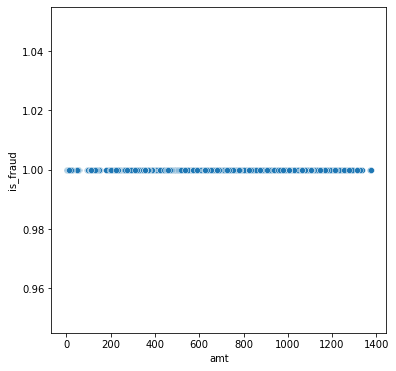

In [22]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df_train[df_train['is_fraud'] == 1], x = 'amt', y = 'is_fraud')
plt.show()

### Fraud happens at all cost

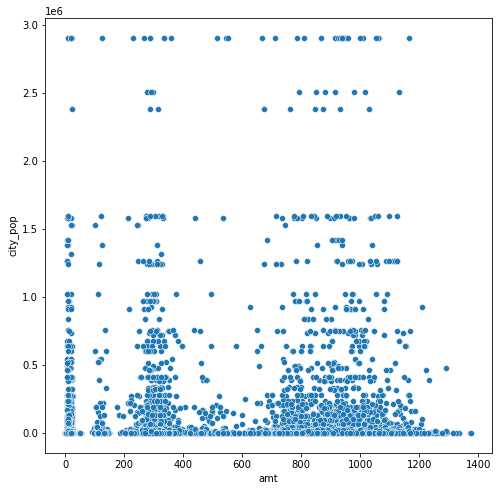

In [23]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df_train[df_train['is_fraud'] == 1], x = 'amt', y = 'city_pop')
plt.show()

### No clear relation between city population and the amount of spending.

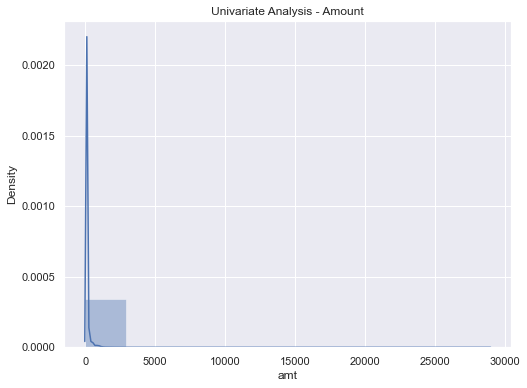

In [24]:
# Checking for amount distribution

plt.figure(figsize = [8,6])
sns.set_theme()
sns.distplot(df_train.amt, bins = 10, kde = True)
plt.title('Univariate Analysis - Amount')
plt.show()

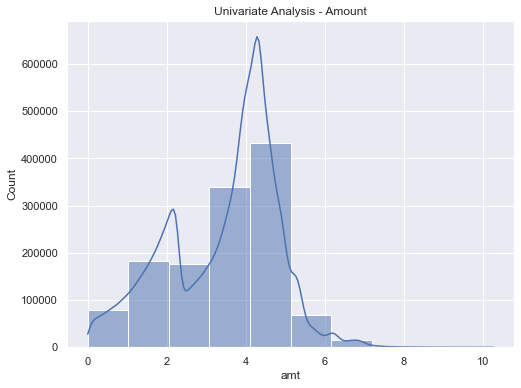

In [25]:
df_train['amt']=np.log(df_train['amt'])
df_test['amt']=np.log(df_test['amt'])
plt.figure(figsize = [8,6])
sns.set_theme()
sns.histplot(df_train['amt'], bins=10, kde=True)
plt.title('Univariate Analysis - Amount')
plt.show()

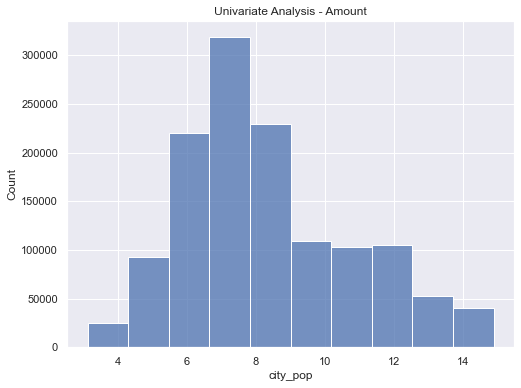

In [26]:
# Checking for population distribution
df_train['city_pop'] = np.log(df_train['city_pop'])
df_test['city_pop'] = np.log(df_test['city_pop'])
plt.figure(figsize = [8,6])
sns.set_theme()
sns.histplot(df_train['city_pop'], bins=10)
plt.title('Univariate Analysis - Amount')
plt.show()

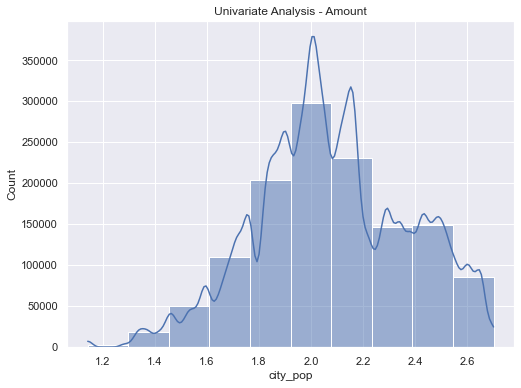

In [27]:
# Checking for population distribution after treating skewness

plt.figure(figsize = [8,6])
sns.set_theme()
sns.histplot(np.log(df_train['city_pop']), bins=10, kde=True)
plt.title('Univariate Analysis - Amount')
plt.show()

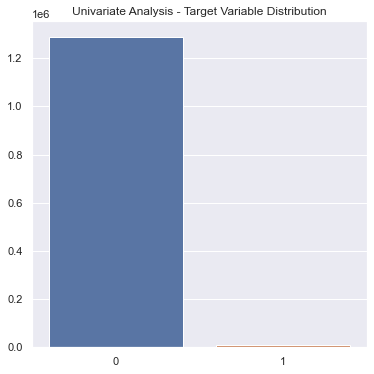

In [28]:
# Let us see the Target Variable(is_fraud) distribution across the dataset

x = [0, 1]
y = [df_train.is_fraud.value_counts()[0],df_train.is_fraud.value_counts()[1]]

plt.figure(figsize = [6,6])
ax = sns.barplot(x = x, y = y)
plt.title('Univariate Analysis - Target Variable Distribution')
plt.show()

### The data shows clear imbalance in the target variable which needs to be handled by sampling methods

Text(0.5, 1.0, 'Univariate Analysis - Gender Distribution')

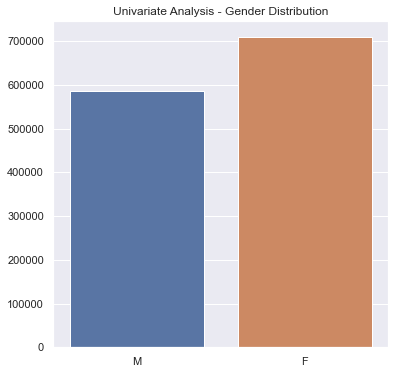

In [29]:
# Let us see the Gender distribution across the dataset

x = ['M', 'F']
y = [len(df_train[df_train['gender']=='M']), len(df_train[df_train['gender']=='F'])]

plt.figure(figsize = [6,6])
ax = sns.barplot(x = x, y = y)
plt.title('Univariate Analysis - Gender Distribution')

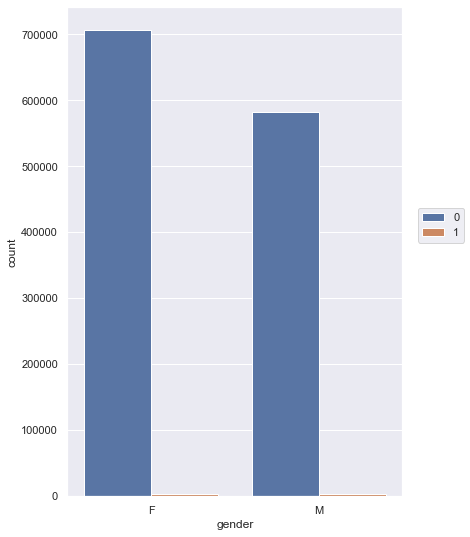

In [30]:
plt.figure(figsize=(6,9))
sns.countplot(data=df_train, x="gender", hue="is_fraud")
plt.legend(bbox_to_anchor=(1.2,0.6))
plt.show()

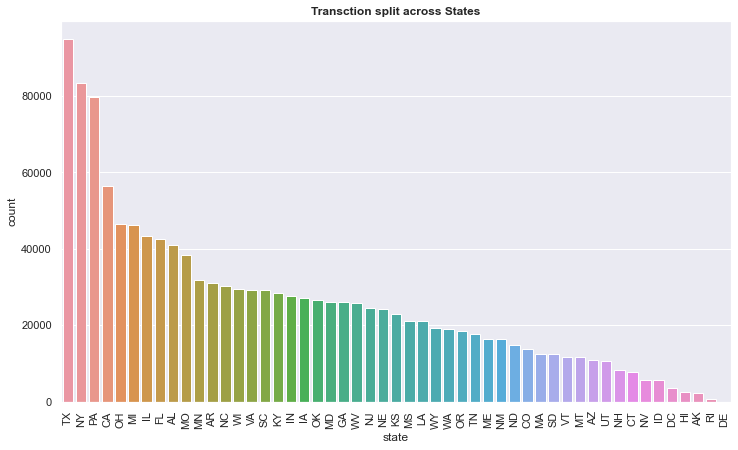

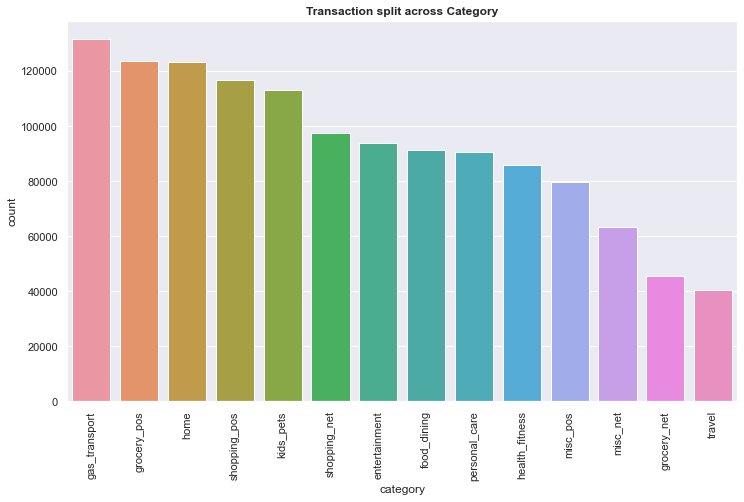

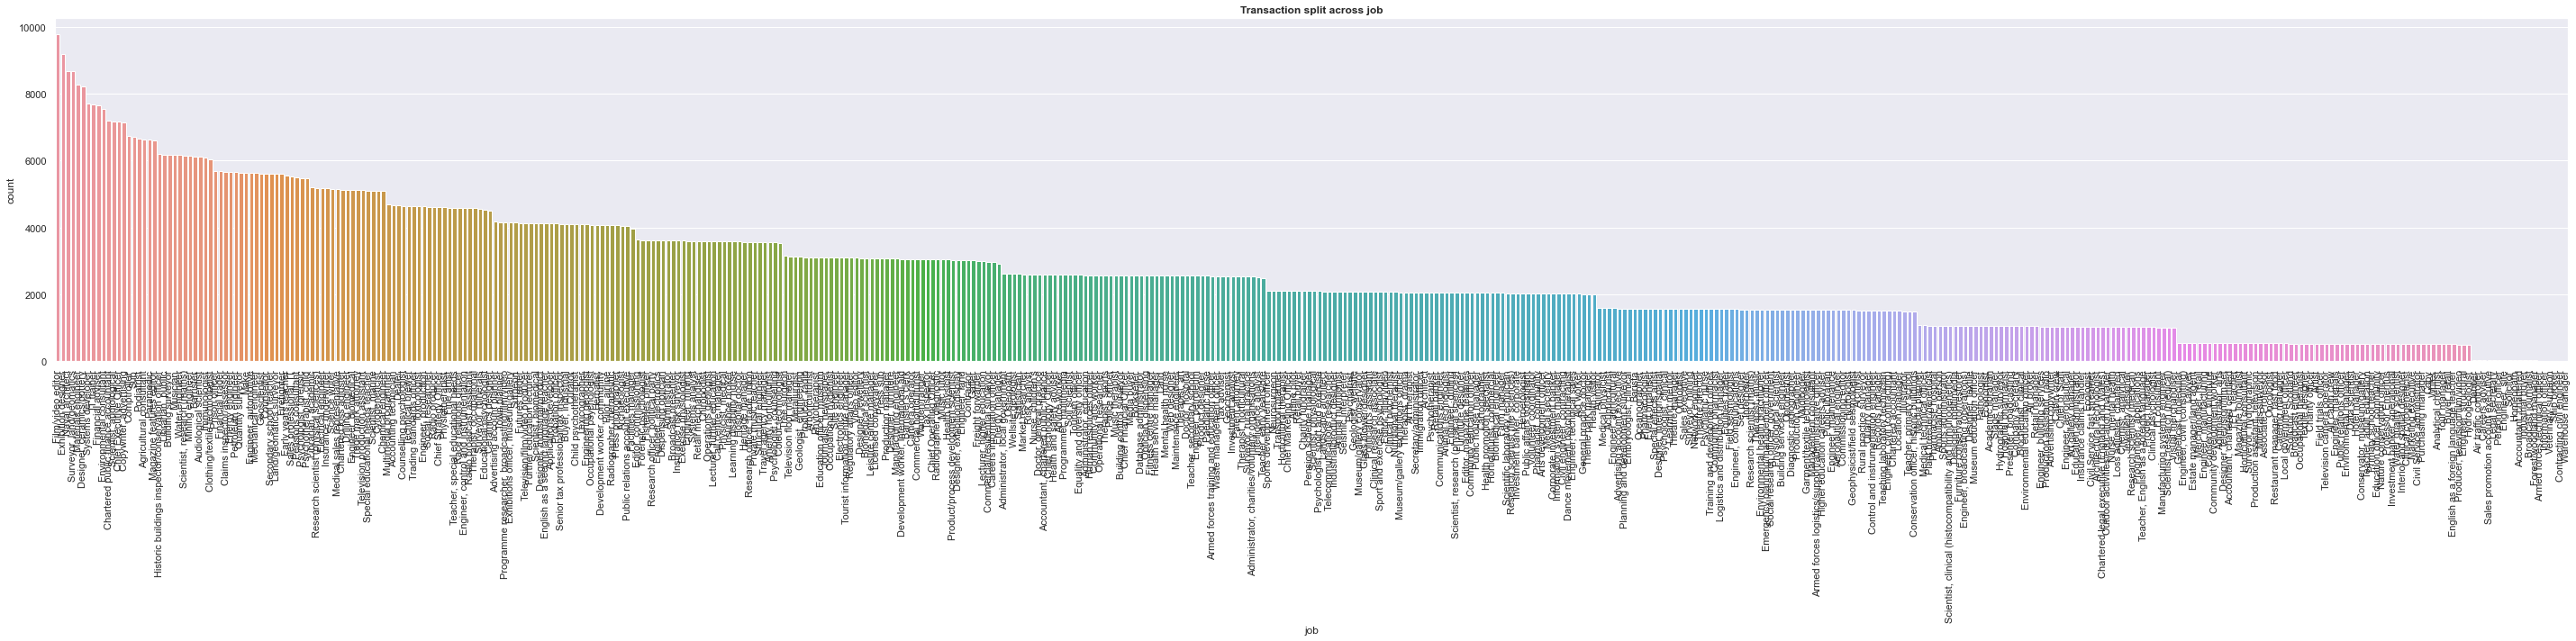

In [31]:
#Same categories are available for both so using single variable for both
plt.figure(figsize=(12,7))
labels = df_train.state.value_counts().index
sns.countplot(x='state',data=df_train,order = labels)
plt.title('Transction split across States',fontweight='bold')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12,7))
labels = df_train.category.value_counts().index
sns.countplot(x='category',data=df_train,order = labels)
plt.title('Transaction split across Category',fontweight='bold')
plt.xticks(rotation=90)
plt.figure(figsize=(50,7))
labels = df_train.job.value_counts().index
sns.countplot(x='job',data=df_train,order = labels)
plt.title('Transaction split across job',fontweight='bold')
plt.xticks(rotation=90)
plt.show()

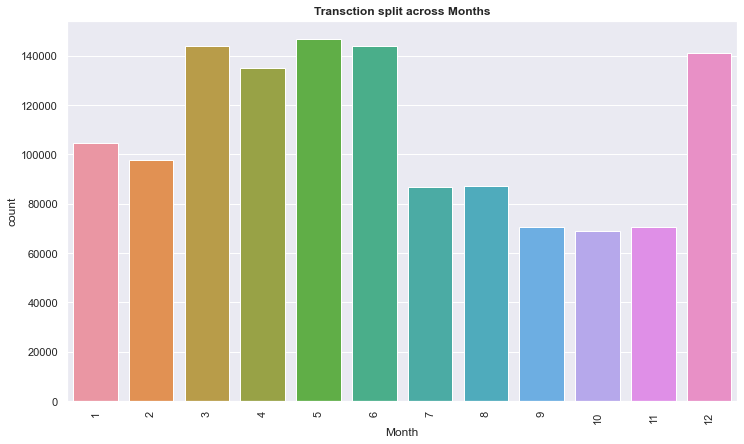

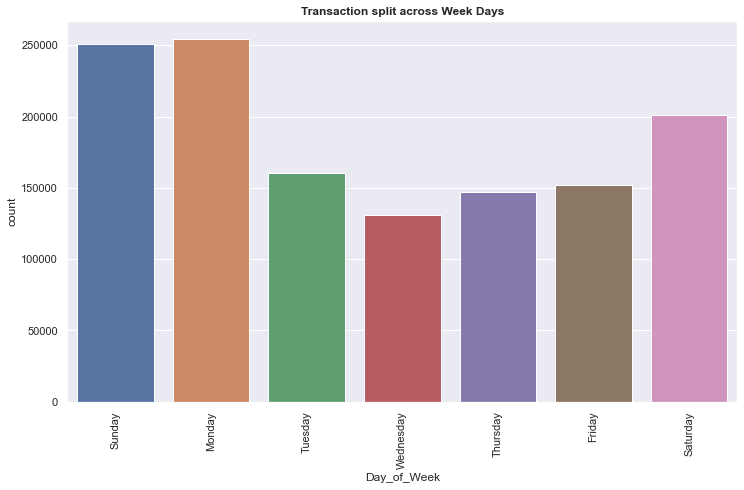

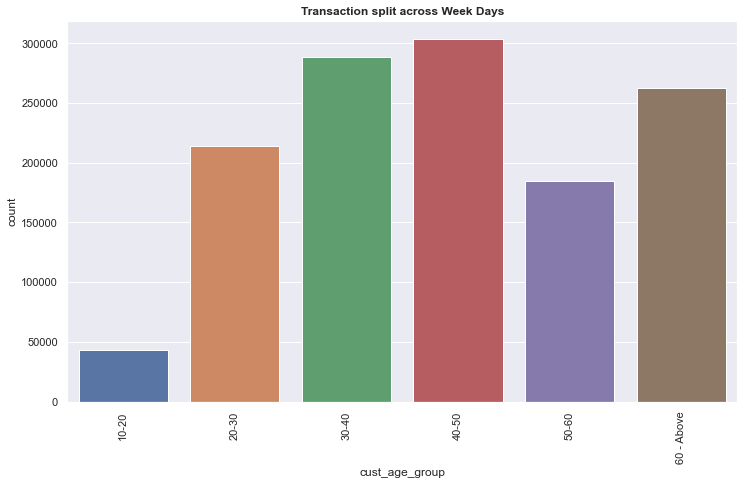

In [32]:
plt.figure(figsize=(12,7))
labels = df_train.Month.value_counts().index.sort_values()
sns.countplot(x='Month',data=df_train,order = labels)
plt.title('Transction split across Months',fontweight='bold')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12,7))
labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.countplot(x='Day_of_Week',data=df_train,order = labels)
plt.title('Transaction split across Week Days',fontweight='bold')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12,7))
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above']
sns.countplot(x='cust_age_group',data=df_train,order = labels)
plt.title('Transaction split across Week Days',fontweight='bold')
plt.xticks(rotation=90)
plt.show()

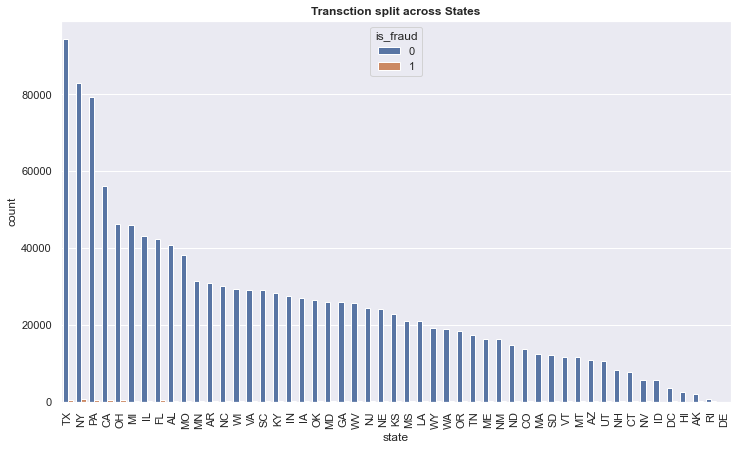

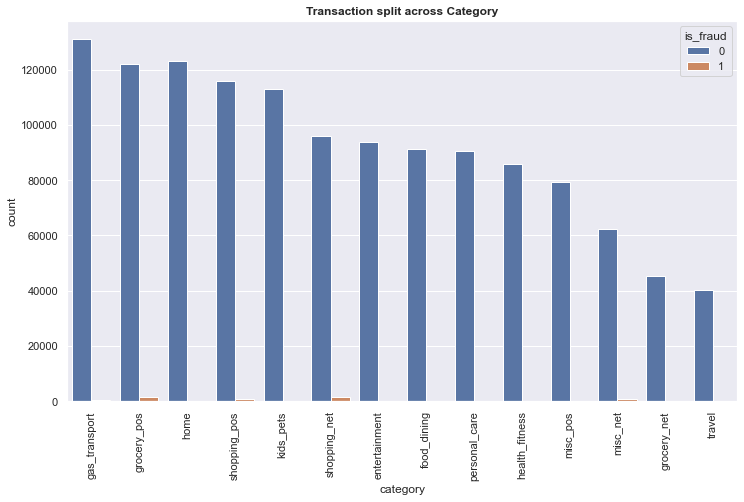

In [33]:
plt.figure(figsize=(12,7))
#Same categories are available for both so using single variable for both
labels = df_train.state.value_counts().index
sns.countplot(x='state',data=df_train,hue='is_fraud',order = labels)
plt.title('Transction split across States',fontweight='bold')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12,7))
labels = df_train.category.value_counts().index
sns.countplot(x='category',data=df_train,hue='is_fraud',order = labels)
plt.title('Transaction split across Category',fontweight='bold')
plt.xticks(rotation=90)
plt.show()

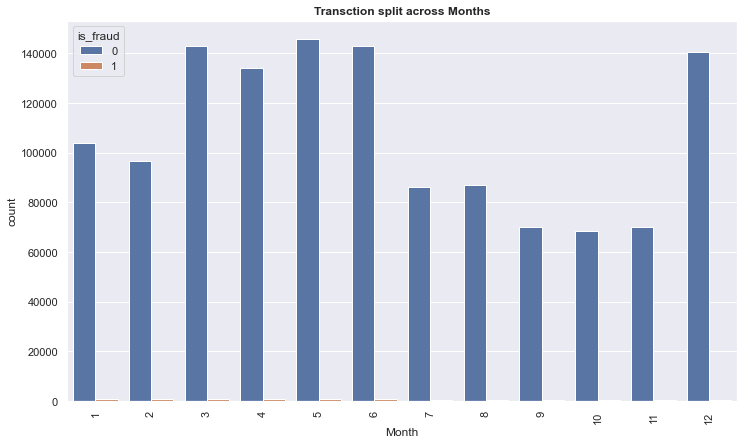

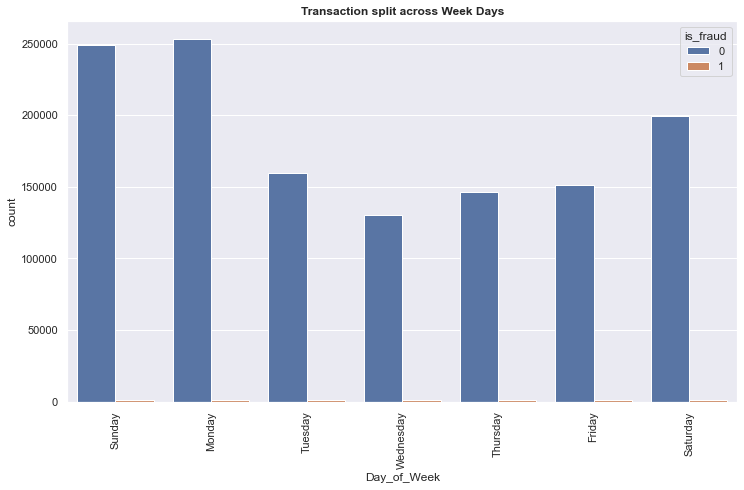

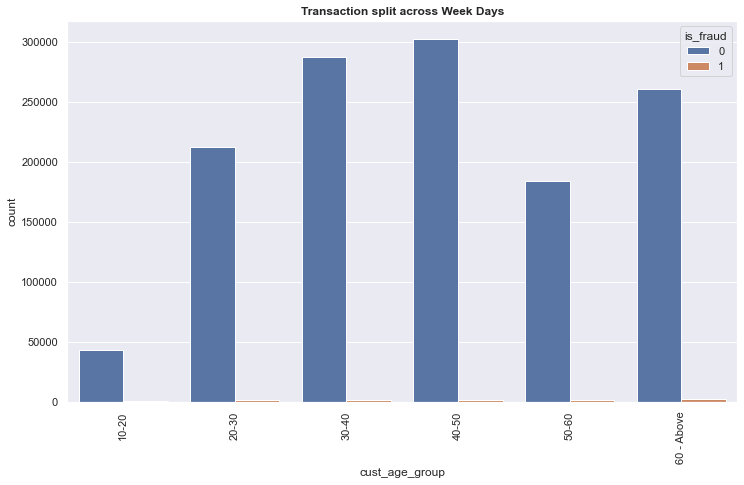

In [34]:
plt.figure(figsize=(12,7))
labels = df_train.Month.value_counts().index.sort_values()
sns.countplot(x='Month',data=df_train,hue='is_fraud',order = labels)
plt.title('Transction split across Months',fontweight='bold')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12,7))
labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.countplot(x='Day_of_Week',data=df_train,hue='is_fraud',order = labels)
plt.title('Transaction split across Week Days',fontweight='bold')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12,7))
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above']
sns.countplot(x='cust_age_group',data=df_train,hue='is_fraud',order = labels)
plt.title('Transaction split across Week Days',fontweight='bold')
plt.xticks(rotation=90)
plt.show()

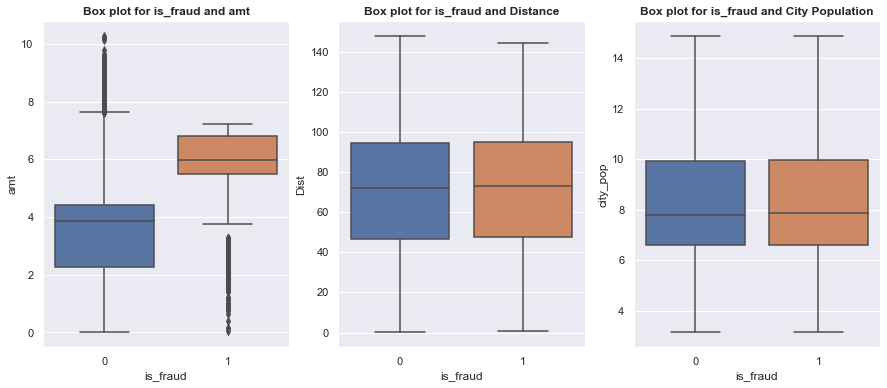

In [35]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(data=df_train, x="is_fraud",y="amt")
plt.title('Box plot for is_fraud and amt',fontweight='bold')
plt.subplot(1,3,2)
sns.boxplot(data=df_train, x="is_fraud",y="Dist")
plt.title('Box plot for is_fraud and Distance',fontweight='bold')
plt.subplot(1,3,3)
sns.boxplot(data=df_train, x="is_fraud",y="city_pop")
plt.title('Box plot for is_fraud and City Population',fontweight='bold')
plt.show()

# Imbalance

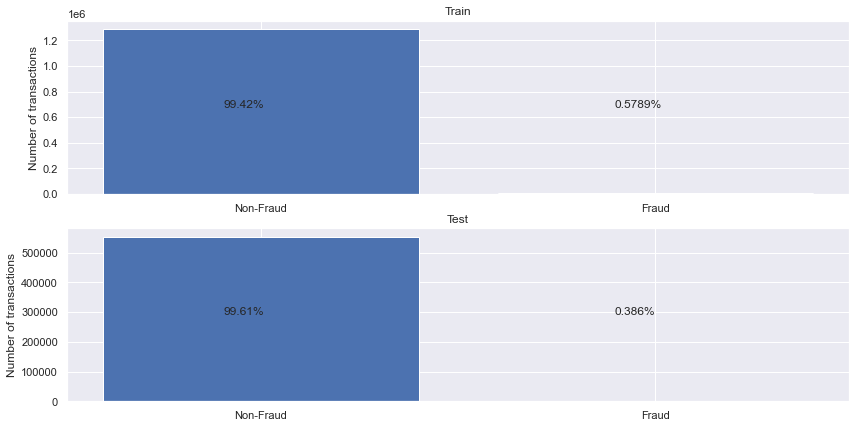

In [36]:
classes_train=df_train['is_fraud'].value_counts()
normal_share_train=classes_train[0]/df_train['is_fraud'].count()*100
fraud_share_train=classes_train[1]/df_train['is_fraud'].count()*100

classes_test=df_test['is_fraud'].value_counts()
normal_share_test=classes_test[0]/df_test['is_fraud'].count()*100
fraud_share_test=classes_test[1]/df_test['is_fraud'].count()*100

plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train)
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test)
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()

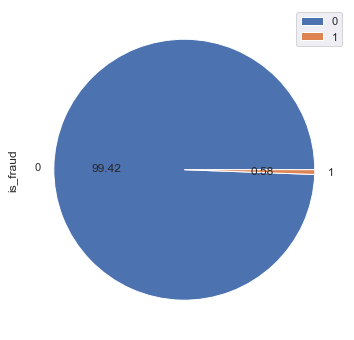

In [37]:
plt.figure(figsize=(10,6))
(df_train.is_fraud.value_counts(normalize=True) * 100).plot.pie(autopct='%.2f')
plt.legend()
plt.show()

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   category        1296675 non-null  object        
 1   amt             1296675 non-null  float64       
 2   gender          1296675 non-null  object        
 3   state           1296675 non-null  object        
 4   city_pop        1296675 non-null  float64       
 5   job             1296675 non-null  object        
 6   is_fraud        1296675 non-null  int64         
 7   trans_date      1296675 non-null  datetime64[ns]
 8   Age             1296675 non-null  int32         
 9   Day_of_Week     1296675 non-null  object        
 10  Dist            1296675 non-null  float64       
 11  Month           1296675 non-null  int64         
 12  cust_age_group  1296675 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3), int32(1), int64(2), objec

In [39]:
df_train.head()

category       amt gender state  city_pop  \
0       misc_net  1.603420      F    NC  8.159089   
1    grocery_pos  4.674976      F    WA  5.003946   
2  entertainment  5.394127      M    ID  8.331827   
3  gas_transport  3.806662      M    MT  7.569928   
4       misc_pos  3.736717      M    VA  4.595120   

                                 job  is_fraud trans_date  Age Day_of_Week  \
0          Psychologist, counselling         0 2019-01-01   31     Tuesday   
1  Special educational needs teacher         0 2019-01-01   41     Tuesday   
2        Nature conservation officer         0 2019-01-01   57     Tuesday   
3                    Patent attorney         0 2019-01-01   52     Tuesday   
4     Dance movement psychotherapist         0 2019-01-01   33     Tuesday   

         Dist  Month cust_age_group  
0   10.509708      1          30-40  
1   30.171468      1          40-50  
2  107.746268      1          50-60  
3   97.629363      1          50-60  
4   66.236025      1          30-40

In [40]:
# Dropping variables not useful for model building

drop_cols = ['state','Day_of_Week','trans_date','job','Age','Month']

df_train = df_train.drop(drop_cols,axis=1)
df_test = df_test.drop(drop_cols,axis=1)

df_train.head()

category       amt gender  city_pop  is_fraud        Dist  \
0       misc_net  1.603420      F  8.159089         0   10.509708   
1    grocery_pos  4.674976      F  5.003946         0   30.171468   
2  entertainment  5.394127      M  8.331827         0  107.746268   
3  gas_transport  3.806662      M  7.569928         0   97.629363   
4       misc_pos  3.736717      M  4.595120         0   66.236025   

  cust_age_group  
0          30-40  
1          40-50  
2          50-60  
3          50-60  
4          30-40

In [41]:
#Converting gender to binary
  
df_train['gender'] = df_train['gender'].map({'M': 1, 'F': 0})
df_test['gender'] = df_test['gender'].map({'M': 1, 'F': 0})

df_train.head()

category       amt  gender  city_pop  is_fraud        Dist  \
0       misc_net  1.603420       0  8.159089         0   10.509708   
1    grocery_pos  4.674976       0  5.003946         0   30.171468   
2  entertainment  5.394127       1  8.331827         0  107.746268   
3  gas_transport  3.806662       1  7.569928         0   97.629363   
4       misc_pos  3.736717       1  4.595120         0   66.236025   

  cust_age_group  
0          30-40  
1          40-50  
2          50-60  
3          50-60  
4          30-40

In [42]:
# Creating dummy variables for Category

df_train = pd.get_dummies(df_train,columns=['category'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['category'],drop_first=True)
df_train = pd.get_dummies(df_train,columns=['cust_age_group'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['cust_age_group'],drop_first=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   amt                        1296675 non-null  float64
 1   gender                     1296675 non-null  int64  
 2   city_pop                   1296675 non-null  float64
 3   is_fraud                   1296675 non-null  int64  
 4   Dist                       1296675 non-null  float64
 5   category_food_dining       1296675 non-null  uint8  
 6   category_gas_transport     1296675 non-null  uint8  
 7   category_grocery_net       1296675 non-null  uint8  
 8   category_grocery_pos       1296675 non-null  uint8  
 9   category_health_fitness    1296675 non-null  uint8  
 10  category_home              1296675 non-null  uint8  
 11  category_kids_pets         1296675 non-null  uint8  
 12  category_misc_net          1296675 non-null  uint8  
 13  category_mis

### Split the Data into Training and Testing Sets

In [43]:
y = df_train['is_fraud']
X = df_train[df_train.columns[~df_train.columns.isin(['is_fraud'])]]

In [44]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
X_train.shape, X_test.shape

((1037340, 22), (259335, 22))

In [46]:
#Rescaling
scaler = MinMaxScaler()

In [47]:
# Apply scaler() 
num_vars = ["amt","city_pop","Dist"]

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [48]:
X_train.describe()

amt        gender      city_pop          Dist  \
count  1.037340e+06  1.037340e+06  1.037340e+06  1.037340e+06   
mean   3.383505e-01  4.521574e-01  4.448630e-01  4.737644e-01   
std    1.358875e-01  4.977061e-01  2.089400e-01  2.063347e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.218606e-01  0.000000e+00  2.958365e-01  3.148856e-01   
50%    3.778796e-01  0.000000e+00  3.976148e-01  4.881608e-01   
75%    4.326712e-01  1.000000e+00  5.775296e-01  6.404959e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

       category_food_dining  category_gas_transport  category_grocery_net  \
count          1.037340e+06            1.037340e+06          1.037340e+06   
mean           7.051979e-02            1.015357e-01          3.493454e-02   
std            2.560211e-01            3.020368e-01          1.836141e-01   
min            0.000000e+00            0.000000e+00          0.000000e+00   
25%            0.000000e+00            0.000000e+00          0.000000e+00   
50%            0.000000e+00            0.000000e+00          0.000000e+00   
75%            0.000000e+00            0.000000e+00          0.000000e+00   
max            1.000000e+00            1.000000e+00          1.000000e+00   

       category_grocery_pos  category_health_fitness  category_home  ...  \
count          1.037340e+06             1.037340e+06   1.037340e+06  ...   
mean           9.541616e-02             6.623865e-02   9.491873e-02  ...   
std            2.937890e-01             2.486989e-01   2.931028e-01  ...   
min            0.000000e+00             0.000000e+00   0.000000e+00  ...   
25%            0.000000e+00             0.000000e+00   0.000000e+00  ...   
50%            0.000000e+00             0.000000e+00   0.000000e+00  ...   
75%            0.000000e+00             0.000000e+00   0.000000e+00  ...   
max            1.000000e+00             1.000000e+00   1.000000e+00  ...   

       category_misc_pos  category_personal_care  category_shopping_net  \
count       1.037340e+06            1.037340e+06           1.037340e+06   
mean        6.158637e-02            7.003586e-02           7.519714e-02   
std         2.404029e-01            2.552076e-01           2.637093e-01   
min         0.000000e+00            0.000000e+00           0.000000e+00   
25%         0.000000e+00            0.000000e+00           0.000000e+00   
50%         0.000000e+00            0.000000e+00           0.000000e+00   
75%         0.000000e+00            0.000000e+00           0.000000e+00   
max         1.000000e+00            1.000000e+00           1.000000e+00   

       category_shopping_pos  category_travel  cust_age_group_20-30  \
count           1.037340e+06     1.037340e+06          1.037340e+06   
mean            9.006015e-02     3.125398e-02          1.648341e-01   
std             2.862681e-01     1.740034e-01          3.710309e-01   
min             0.000000e+00     0.000000e+00          0.000000e+00   
25%             0.000000e+00     0.000000e+00          0.000000e+00   
50%             0.000000e+00     0.000000e+00          0.000000e+00   
75%             0.000000e+00     0.000000e+00          0.000000e+00   
max             1.000000e+00     1.000000e+00          1.000000e+00   

       cust_age_group_30-40  cust_age_group_40-50  cust_age_group_50-60  \
count          1.037340e+06          1.037340e+06          1.037340e+06   
mean           2.227322e-01          2.339532e-01          1.425695e-01   
std            4.160802e-01          4.233430e-01          3.496334e-01   
min            0.000000e+00          0.000000e+00          0.000000e+00   
25%            0.000000e+00          0.000000e+00          0.000000e+00   
50%            0.000000e+00          0.000000e+00          0.000000e+00   
75%            0.000000e+00          0.000000e+00          0.000000e+00   
max            1.000000e+00          1.000000e+00          1.000000e+00   

       cust_age_group_60 - Above  
count               1.03

## Model Building and Tuning

In [49]:
lr_unsampled = LogisticRegression().fit(X_train,y_train)

In [50]:
params_lr = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search_1 = GridSearchCV(estimator=lr_unsampled,
                    param_grid=params_lr,
                    cv=4,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [51]:
grid_search_1.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='recall', verbose=1)

In [52]:
grid_search_1.best_score_

0.0

In [53]:
#Model Evaluation
def evaluate_model_lr_unsampled(classifier):
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(metrics.recall_score(y_train, y_train_pred))
    print(metrics.confusion_matrix(y_train, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))

In [54]:
lr_unsampled_best = grid_search_1.best_estimator_
evaluate_model_lr_unsampled(lr_unsampled_best)

Train set performance:
0.0
[[1031149     205]
 [   5986       0]]
-------------------------
Test set performance:
1.0
[[  9141 248674]
 [     0   1520]]


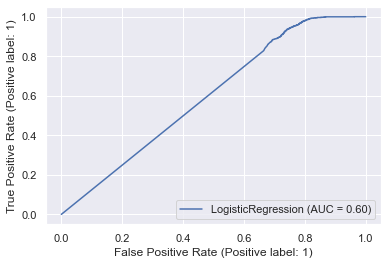

In [55]:
#ROC Curve
metrics.plot_roc_curve(lr_unsampled, X_test, y_test)

### Metrics for Logistic Regression - Unsampled: Recall on Train: 0.000 Recall on Test: 1.0 Area Under the Curve: 0.60

## Logistic Regression with SMOTE

In [56]:
X_train_smote_lr, y_train_smote_lr = SMOTE().fit_resample(X_train, y_train)

In [57]:
lr_smote = LogisticRegression().fit(X_train_smote_lr,y_train_smote_lr)

In [58]:
params_lr = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search_2 = GridSearchCV(estimator=lr_smote,
                    param_grid=params_lr,
                    cv=4,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [59]:
%%time
grid_search_2.fit(X_train_smote_lr, y_train_smote_lr)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
CPU times: total: 16.8 s
Wall time: 1min


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='recall', verbose=1)

In [60]:
grid_search_2.best_score_

0.7346701515194374

In [61]:
def evaluate_model_lr_smote(classifier):
    y_train_pred = classifier.predict(X_train_smote_lr)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(metrics.recall_score(y_train_smote_lr, y_train_pred))
    print(metrics.confusion_matrix(y_train_smote_lr, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))

In [62]:
lr_smote_best = grid_search_2.best_estimator_
evaluate_model_lr_smote(lr_smote_best)

Train set performance:
0.7346662736557962
[[762963 268391]
 [273653 757701]]
-------------------------
Test set performance:
1.0
[[  7982 249833]
 [     0   1520]]


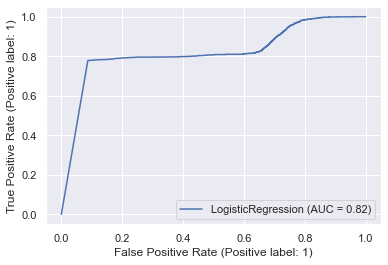

In [63]:
metrics.plot_roc_curve(lr_smote_best, X_test, y_test)

### Metrics for Logistic Regression - SMOTE: Recall on Train: 0.73 Recall on Test: 1.0 Area Under the Curve: 0.82

## Logistic Regression with ADASYN

In [64]:
X_train_adasyn_lr, y_train_adasyn_lr = ADASYN().fit_resample(X_train, y_train)
lr_adasyn = LogisticRegression().fit(X_train_adasyn_lr,y_train_adasyn_lr)

In [65]:
params_lr = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search_3 = GridSearchCV(estimator=lr_adasyn,
                    param_grid=params_lr,
                    cv=4,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [66]:
%%time
grid_search_3.fit(X_train_adasyn_lr, y_train_adasyn_lr)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
CPU times: total: 18.3 s
Wall time: 1min 7s


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='recall', verbose=1)

In [67]:
grid_search_3.best_score_

0.6726070529854454

In [68]:
def evaluate_model_lr_adasyn(classifier):
    y_train_pred = classifier.predict(X_train_adasyn_lr)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(metrics.recall_score(y_train_adasyn_lr, y_train_pred))
    print(metrics.confusion_matrix(y_train_adasyn_lr, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(metrics.recall_score(y_test, y_test_pred))
    print(metrics.confusion_matrix(y_test, y_test_pred))

In [69]:
lr_adasyn_best = grid_search_3.best_estimator_
evaluate_model_lr_adasyn(lr_adasyn_best)

Train set performance:
0.6763357150474565
[[742571 288783]
 [333850 697620]]
-------------------------
Test set performance:
0.9993421052631579
[[ 15250 242565]
 [     1   1519]]


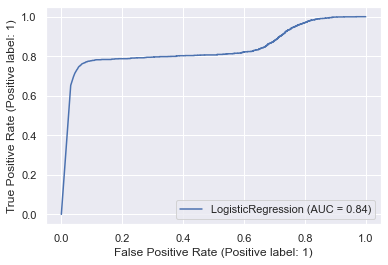

In [70]:
metrics.plot_roc_curve(lr_adasyn_best, X_test, y_test)

### Metrics for Logistic Regression - ADASYN: Recall on Train: 0.67 Recall on Test: 0.99 Area Under the Curve: 0.84

## Decision Tree Classifier - Unsampled

In [71]:
def get_graph(classifier):
    dot_data = StringIO()
    
    export_graphviz(classifier, out_file = dot_data, filled = True, rounded = True,
               feature_names=X.columns,
               class_names=['No Fraud', 'Fraud'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [72]:
dt_unsampled = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

In [73]:
def evaluate_model_unsampled(classifier):
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(recall_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(recall_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [74]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80,110],
    'criterion': ['gini']
}

grid_search_4 = GridSearchCV(estimator=dt_unsampled,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [75]:
%%time
grid_search_4.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 3.83 s
Wall time: 25.3 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [80, 110]},
             scoring='recall', verbose=1)

In [76]:
grid_search_4.best_score_

0.6181137317417081

In [77]:
dt_unsampled_best = grid_search_4.best_estimator_
evaluate_model_unsampled(dt_unsampled_best)

Train set performance:
0.6351486802539258
[[1030575     779]
 [   2184    3802]]
-------------------------
Test set performance:
0.0
[[257656    159]
 [  1520      0]]


In [78]:
grid_search_4.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 110}

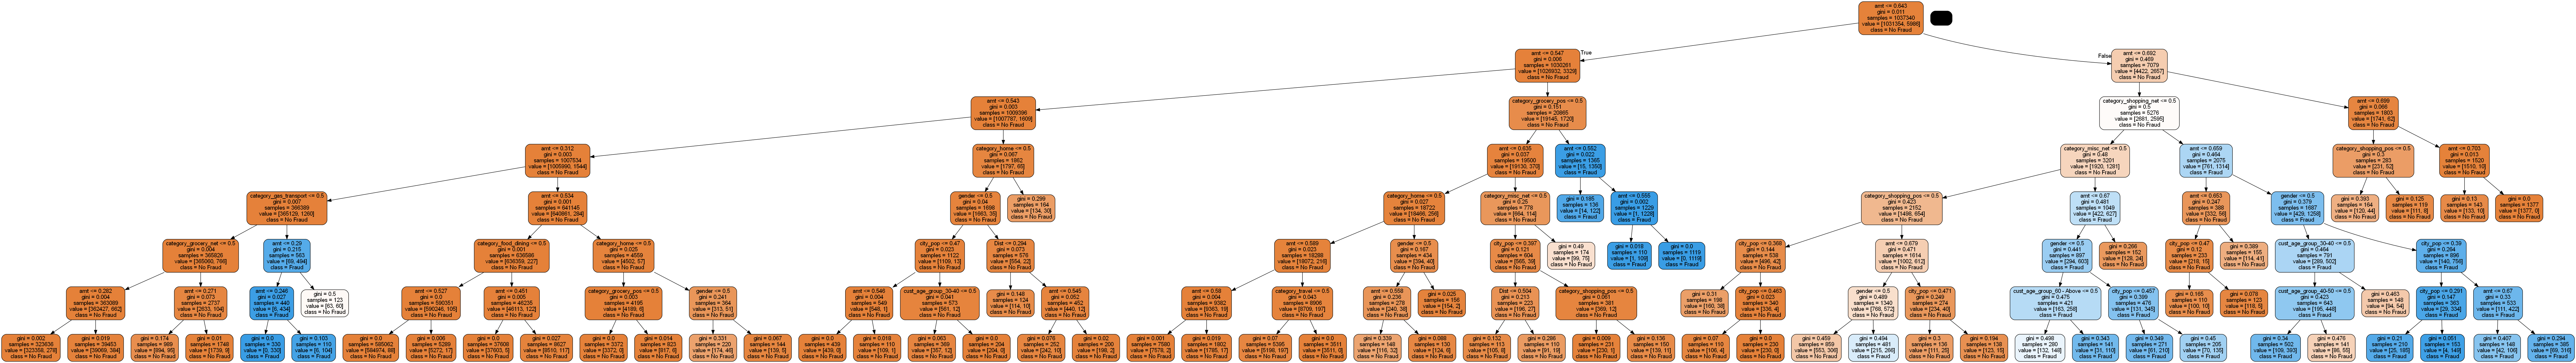

In [79]:
gph = get_graph(dt_unsampled_best)
Image(gph.create_png())

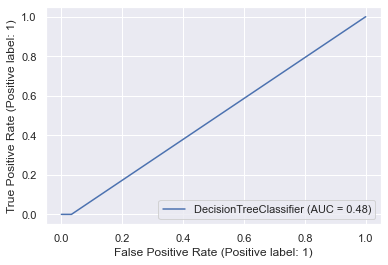

In [80]:
#ROC Curve
metrics.plot_roc_curve(dt_unsampled_best, X_test, y_test)

### Metrics for Decision Trees - Unsampled: Recall on Train: 0.63 Recall on Test: 0.0 Area Under the Curve: 0.48

## Decision Tree with SMOTE

In [81]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

In [82]:
dt_smote = DecisionTreeClassifier(random_state=42).fit(X_train_smote,y_train_smote)

In [83]:
def evaluate_model_smote(classifier):
    y_train_pred = classifier.predict(X_train_smote)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(recall_score(y_train_smote, y_train_pred))
    print(confusion_matrix(y_train_smote, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(recall_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [84]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80,110],
    'criterion': ['gini']
}

grid_search_5 = GridSearchCV(estimator=dt_smote,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [85]:
%%time
grid_search_5.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 7.81 s
Wall time: 42.8 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [80, 110]},
             scoring='recall', verbose=1)

In [86]:
grid_search_5.best_score_

0.9587716730747289

In [87]:
dt_smote_best = grid_search_5.best_estimator_
evaluate_model_smote(dt_smote_best)

Train set performance:
0.9591313942642391
[[972793  58561]
 [ 42150 989204]]
-------------------------
Test set performance:
0.0
[[255647   2168]
 [  1520      0]]


In [88]:
grid_search_5.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 80}

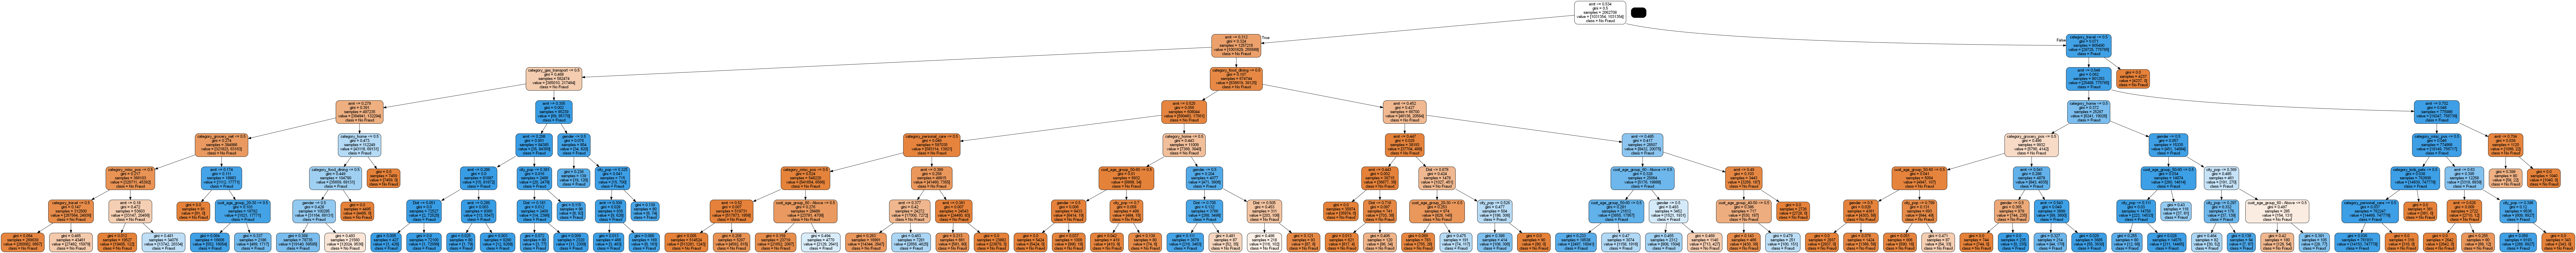

In [89]:
gph = get_graph(dt_smote_best)
Image(gph.create_png())

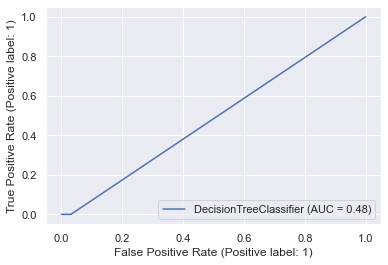

In [90]:
#ROC Curve
metrics.plot_roc_curve(dt_smote_best, X_test, y_test)

### Metrics for Decision Trees - SMOTE: Recall on Train: 0.95 Recall on Test: 0.0 Area Under the Curve: 0.48

## Decision Tree with ADASYN

In [91]:
X_train_adasyn, y_train_adasyn = ADASYN().fit_resample(X_train, y_train)

In [92]:
def evaluate_model_adasyn(classifier):
    y_train_pred = classifier.predict(X_train_adasyn)
    y_test_pred = classifier.predict(X_test)
    
    print('Train set performance:')
    print(recall_score(y_train_adasyn, y_train_pred))
    print(confusion_matrix(y_train_adasyn, y_train_pred))
    print("-"*25)
    print('Test set performance:')
    print(recall_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [93]:
dt_adasyn = DecisionTreeClassifier(random_state=42).fit(X_train_adasyn,y_train_adasyn)

In [94]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80,110],
    'criterion': ['gini']
}

grid_search_6 = GridSearchCV(estimator=dt_adasyn,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [95]:
%%time
grid_search_6.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 7.36 s
Wall time: 52.2 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [80, 110]},
             scoring='recall', verbose=1)

In [96]:
grid_search_6.best_score_

0.95089532414903

In [97]:
dt_adasyn_best = grid_search_6.best_estimator_
evaluate_model_adasyn(dt_adasyn_best)

Train set performance:
0.9495254345739575
[[963347  68007]
 [ 52063 979407]]
-------------------------
Test set performance:
0.0
[[255697   2118]
 [  1520      0]]


In [98]:
grid_search_6.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 80}

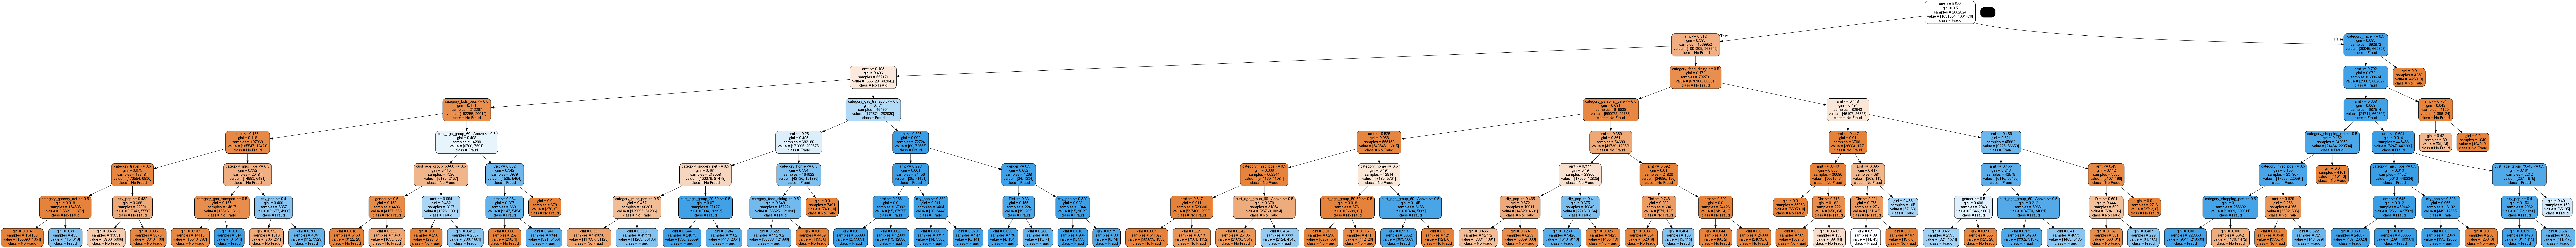

In [99]:
gph = get_graph(dt_adasyn_best)
Image(gph.create_png())

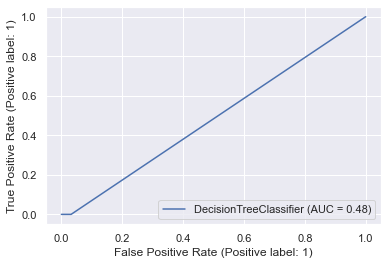

In [100]:
#ROC Curve
metrics.plot_roc_curve(dt_adasyn_best, X_test, y_test)

### Metrics for Decision Trees - ADASYN: Recall on Train: 0.94 Recall on Test: 0.0 Area Under the Curve: 0.48

## Random Forest - Unsampled

In [101]:
rf_unsampled = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [102]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80,110],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_7 = GridSearchCV(estimator=rf_unsampled,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [103]:
%%time
grid_search_7.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 6.44 s
Wall time: 2min 13s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [80, 110],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [104]:
rf_unsampled_best = grid_search_7.best_estimator_
evaluate_model_unsampled(rf_unsampled_best)

Train set performance:
0.2891747410624791
[[1031144     210]
 [   4255    1731]]
-------------------------
Test set performance:
0.0
[[257761     54]
 [  1520      0]]


In [105]:
grid_search_7.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 80,
 'n_estimators': 10}

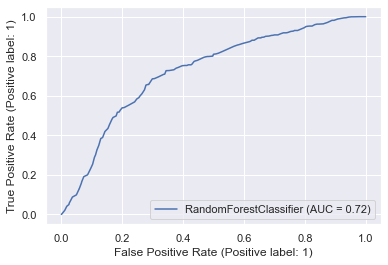

In [106]:
#ROC Curve
metrics.plot_roc_curve(rf_unsampled_best, X_test, y_test)

### Metrics for Random Forest - Unsampled: Recall on Train: 0.28 Recall on Test: 0.0 Area Under the Curve: 0.72

## Random Forest - SMOTE

In [107]:
rf_smote = RandomForestClassifier(random_state=42).fit(X_train_smote, y_train_smote)

In [108]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80,110],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_8 = GridSearchCV(estimator=rf_smote,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [109]:
%%time
grid_search_8.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 22.1 s
Wall time: 5min 49s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [80, 110],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [110]:
rf_smote_best = grid_search_8.best_estimator_
evaluate_model_smote(rf_smote_best)

Train set performance:
0.8650182187687254
[[1007229   24125]
 [ 139214  892140]]
-------------------------
Test set performance:
0.5657894736842105
[[187247  70568]
 [   660    860]]


In [111]:
grid_search_8.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 110,
 'n_estimators': 15}

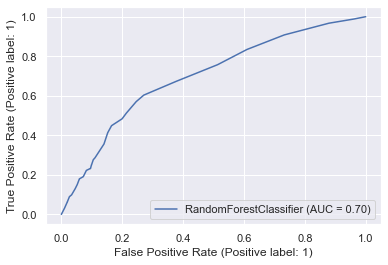

In [112]:
#ROC Curve
metrics.plot_roc_curve(rf_smote, X_test, y_test)

### Metrics for Random Forest - SMOTE: Recall on Train: 0.88 Recall on Test: 0.88 Area Under the Curve: 0.68

## Random Forest - ADASYN

In [113]:
rf_adasyn = RandomForestClassifier(random_state=42).fit(X_train_adasyn, y_train_adasyn)

In [114]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80,110],
    'criterion': ['gini'],
    'n_estimators': [10,15,30]
}

grid_search_9 = GridSearchCV(estimator=rf_adasyn,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [115]:
%%time
grid_search_9.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 35.4 s
Wall time: 6min 16s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'min_samples_leaf': [80, 110],
                         'n_estimators': [10, 15, 30]},
             scoring='recall', verbose=1)

In [116]:
grid_search_9.best_score_

0.855738896914113

In [117]:
rf_adasyn_best = grid_search_9.best_estimator_
evaluate_model_adasyn(rf_adasyn_best)

Train set performance:
0.8606813576739992
[[991474  39880]
 [143703 887767]]
-------------------------
Test set performance:
0.8664473684210526
[[105563 152252]
 [   203   1317]]


In [118]:
grid_search_9.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 80,
 'n_estimators': 15}

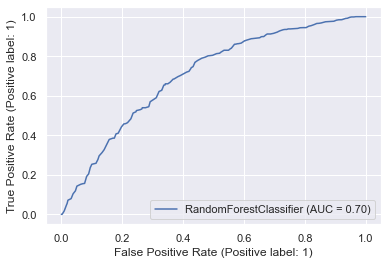

In [119]:
#ROC Curve
metrics.plot_roc_curve(rf_adasyn_best, X_test, y_test)

### Metrics for Random Forest - ADASYN: Recall on Train: 0.86 Recall on Test: 0.82 Area Under the Curve: 0.70

## XGBoost - Unsampled

In [120]:
xgb_unsampled = XGBClassifier().fit(X_train, y_train)

In [121]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80],
    'criterion': ['gini'],
    'n_estimators': [15],
    'learning_rate': [0.1,0.3,0.5]
}

grid_search_10 = GridSearchCV(estimator=xgb_unsampled,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [122]:
%%time
grid_search_10.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[23:13:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

CPU times: total: 1min 46s
Wall time: 2min 56s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [123]:
xgb_best_unsampled = grid_search_10.best_estimator_
evaluate_model_unsampled(xgb_best_unsampled)

Train set performance:
0.7049782826595389
[[1030685     669]
 [   1766    4220]]
-------------------------
Test set performance:
0.0
[[257475    340]
 [  1520      0]]


In [124]:
grid_search_10.best_params_

{'criterion': 'gini',
 'learning_rate': 0.5,
 'max_depth': 7,
 'min_samples_leaf': 80,
 'n_estimators': 15}

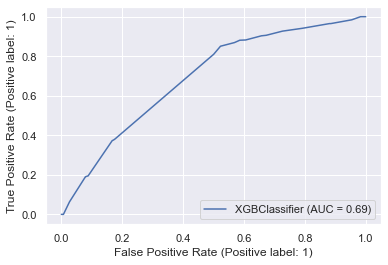

In [125]:
#ROC Curve
metrics.plot_roc_curve(xgb_best_unsampled, X_test, y_test)

### Metrics for XGBoost - Unsampled: Recall on Train: 0.70 Recall on Test: 0.0 Area Under the Curve: 0.67

## XGBoost - SMOTE

In [126]:
xgb_smote = XGBClassifier().fit(X_train_smote, y_train_smote)

In [127]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80],
    'criterion': ['gini'],
    'n_estimators': [15],
    'learning_rate': [0.1,0.3,0.5]
}

grid_search_11 = GridSearchCV(estimator=xgb_smote,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall')

In [128]:
%%time
grid_search_11.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[23:23:55] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

CPU times: total: 3min 51s
Wall time: 7min 37s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [129]:
xgb_best_smote = grid_search_11.best_estimator_
evaluate_model_smote(xgb_best_smote)

Train set performance:
0.9822146421112441
[[ 998395   32959]
 [  18343 1013011]]
-------------------------
Test set performance:
0.06710526315789474
[[249489   8326]
 [  1418    102]]


In [130]:
grid_search_11.best_params_

{'criterion': 'gini',
 'learning_rate': 0.5,
 'max_depth': 7,
 'min_samples_leaf': 80,
 'n_estimators': 15}

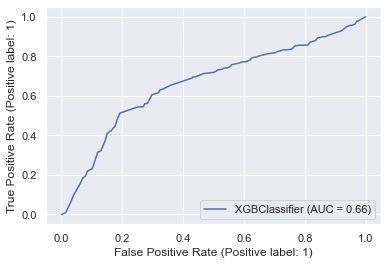

In [131]:
#ROC Curve
metrics.plot_roc_curve(xgb_best_smote, X_test, y_test)

### Metrics for XGBoost - SMOTE: Recall on Train: 0.98 Recall on Test: 0.23 Area Under the Curve: 0.68

## XGBoost - ADASYN

In [132]:
xgb_adasyn = XGBClassifier().fit(X_train_adasyn, y_train_adasyn)

In [133]:
params = {
    'max_depth': [7],
    'min_samples_leaf': [80],
    'criterion': ['gini'],
    'n_estimators': [15],
    'learning_rate': [0.1,0.3,0.5]
}
grid_search_12 = GridSearchCV(estimator=xgb_adasyn,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1, verbose=1,
                    scoring='recall',
                    refit=True)

In [134]:
%%time
grid_search_12.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[23:34:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf" } are not used.

CPU times: total: 3min 39s
Wall time: 7min 51s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [135]:
xgb_best_adasyn = grid_search_12.best_estimator_
evaluate_model_adasyn(xgb_best_adasyn)

Train set performance:
0.9814003315656297
[[ 989969   41385]
 [  19185 1012285]]
-------------------------
Test set performance:
0.0
[[257180    635]
 [  1520      0]]


In [136]:
type(xgb_best_adasyn)

xgboost.sklearn.XGBClassifier

In [137]:
grid_search_12.best_params_

{'criterion': 'gini',
 'learning_rate': 0.5,
 'max_depth': 7,
 'min_samples_leaf': 80,
 'n_estimators': 15}

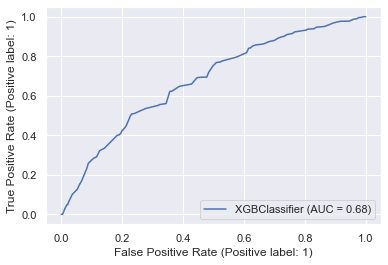

In [138]:
#ROC Curve
metrics.plot_roc_curve(xgb_best_adasyn, X_test, y_test)

### Metrics for Random Forest - SMOTE: Recall on Train: 0.98 Recall on Test: 0.0 Area Under the Curve: 0.59

## Testing the results on the unseen Test Data:

In [139]:
summary_dict = {
    'Model': ['Logistic Regression - Unsampled', 'Logistic Regression - SMOTE', 'Logistic Regression - ADASYN',
             'Decision Trees - Unsampled', 'Decision Trees - SMOTE', 'Decision Trees - ADASYN',
             'Random Forest - Unsampled', 'Random Forest - SMOTE', 'Random Forest - ADASYN',
             'XGBoost - Unsampled', 'XGBoost - SMOTE', 'XGBoost - ADASYN'],
    'Recall on Train' : [0.0,0.73,0.67,0.63,0.95,0.94,0.28,0.88,0.86,0.70,0.98,0.98],
    'Recall on Test' : [1.0,1.0,0.99,0.0,0.00,0.0,0.0,0.88,0.82,0.0,0.23,0.0],
    'AUC Score' : [0.60,0.82,0.84,0.48,0.48,0.48,0.72,0.68,0.70,0.67,0.68,0.71]
}

summary_df = pd.DataFrame(summary_dict)
summary_df

Model  Recall on Train  Recall on Test  \
0   Logistic Regression - Unsampled             0.00            1.00   
1       Logistic Regression - SMOTE             0.73            1.00   
2      Logistic Regression - ADASYN             0.67            0.99   
3        Decision Trees - Unsampled             0.63            0.00   
4            Decision Trees - SMOTE             0.95            0.00   
5           Decision Trees - ADASYN             0.94            0.00   
6         Random Forest - Unsampled             0.28            0.00   
7             Random Forest - SMOTE             0.88            0.88   
8            Random Forest - ADASYN             0.86            0.82   
9               XGBoost - Unsampled             0.70            0.00   
10                  XGBoost - SMOTE             0.98            0.23   
11                 XGBoost - ADASYN             0.98            0.00   

    AUC Score  
0        0.60  
1        0.82  
2        0.84  
3        0.48  
4        0.48  
5        0.48  
6        0.72  
7        0.68  
8        0.70  
9        0.67  
10       0.68  
11       0.71

In [140]:
summary_df.sort_values('AUC Score', ascending = False)

Model  Recall on Train  Recall on Test  \
2      Logistic Regression - ADASYN             0.67            0.99   
1       Logistic Regression - SMOTE             0.73            1.00   
6         Random Forest - Unsampled             0.28            0.00   
11                 XGBoost - ADASYN             0.98            0.00   
8            Random Forest - ADASYN             0.86            0.82   
7             Random Forest - SMOTE             0.88            0.88   
10                  XGBoost - SMOTE             0.98            0.23   
9               XGBoost - Unsampled             0.70            0.00   
0   Logistic Regression - Unsampled             0.00            1.00   
3        Decision Trees - Unsampled             0.63            0.00   
4            Decision Trees - SMOTE             0.95            0.00   
5           Decision Trees - ADASYN             0.94            0.00   

    AUC Score  
2        0.84  
1        0.82  
6        0.72  
11       0.71  
8        0.70  
7        0.68  
10       0.68  
9        0.67  
0        0.60  
3        0.48  
4        0.48  
5        0.48

In [141]:
# Splitting the test data into X and y:

y_final = df_test.pop('is_fraud')
X_final = df_test

In [142]:
y_pred_final_rf_adasyn = rf_adasyn.predict(X_final)
print(recall_score(y_final, y_pred_final_rf_adasyn))
print(confusion_matrix(y_final, y_pred_final_rf_adasyn))

0.046620046620046623
[[543271  10303]
 [  2045    100]]


In [143]:
y_pred_final_rf_smote = rf_smote.predict(X_final)
print(recall_score(y_final, y_pred_final_rf_smote))
print(confusion_matrix(y_final, y_pred_final_rf_smote))

0.17529137529137528
[[513135  40439]
 [  1769    376]]


In [144]:
y_pred_xgb_adasyn = xgb_best_adasyn.predict(X_final)
print(recall_score(y_final, y_pred_xgb_adasyn))
print(confusion_matrix(y_final, y_pred_xgb_adasyn))

0.0
[[552137   1437]
 [  2145      0]]


In [145]:
y_pred_xgb_smote = xgb_best_smote.predict(X_final)
print(recall_score(y_final, y_pred_xgb_smote))
print(confusion_matrix(y_final, y_pred_xgb_smote))

0.0662004662004662
[[535780  17794]
 [  2003    142]]


In [146]:
y_pred_final_dt_smote = dt_smote.predict(X_final)
print(recall_score(y_final, y_pred_final_dt_smote))
print(confusion_matrix(y_final, y_pred_final_dt_smote))

0.0
[[553401    173]
 [  2145      0]]


In [147]:
y_pred_final_dt_adasyn = dt_adasyn.predict(X_final)
print(recall_score(y_final, y_pred_final_dt_adasyn))
print(confusion_matrix(y_final, y_pred_final_dt_adasyn))

0.0
[[553527     47]
 [  2145      0]]


In [148]:
y_pred_final_lr_smote = lr_smote.predict(X_final)
print(recall_score(y_final, y_pred_final_lr_smote))
print(confusion_matrix(y_final, y_pred_final_lr_smote))

1.0
[[ 17573 536001]
 [     0   2145]]


In [149]:
y_pred_final_lr_adasyn = lr_adasyn.predict(X_final)
print(recall_score(y_final, y_pred_final_lr_adasyn))
print(confusion_matrix(y_final, y_pred_final_lr_adasyn))

0.9986013986013986
[[ 33428 520146]
 [     3   2142]]


In [150]:
# Creating a dataframe to compare the actual v/s predicted values of y:

y_pred_final_lr_adasyn = pd.Series(y_pred_final_lr_adasyn)
df_pred = pd.concat([X_final, y_final,y_pred_final_lr_adasyn], axis = 1)
df_pred.rename(columns = {0:'y_pred'}, inplace = True)
df_pred.head()

amt  gender   city_pop        Dist  category_food_dining  \
0  1.050822       1  12.717389   24.748687                     0   
1  3.395850       0   5.710427   98.988771                     0   
2  3.720378       0  10.448599   73.344386                     0   
3  4.095178       1  10.910843   27.746011                     0   
4  1.160021       1   7.026427  105.772207                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   

   category_health_fitness  category_home  ...  category_shopping_net  \
0                        0              0  ...                      0   
1                        0              0  ...                      0   
2                        1              0  ...                      0   
3                        0              0  ...                      0   
4                        0              0  ...                      0   

   category_shopping_pos  category_travel  cust_age_group_20-30  \
0                      0                0                     0   
1                      0                0                     0   
2                      0                0                     0   
3                      0                0                     0   
4                      0                1                     0   

   cust_age_group_30-40  cust_age_group_40-50  cust_age_group_50-60  \
0                     1                     0                     0   
1                     0                     1                     0   
2                     0                     0                     1   
3                     0                     0                     1   
4                     1                     0                     0   

   cust_age_group_60 - Above  is_fraud  y_pred  
0                          0         0       1  
1                          0         0       1  
2                          0         0       1  
3                          0         0       1  
4                          0         0       0  

[5 rows x 24 columns]

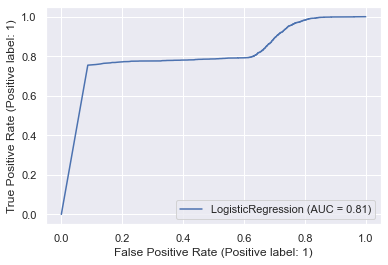

In [151]:
#ROC Curve
metrics.plot_roc_curve(lr_smote, X_final, y_final)

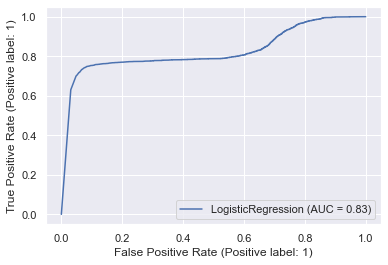

In [152]:
#ROC Curve
metrics.plot_roc_curve(lr_adasyn, X_final, y_final)

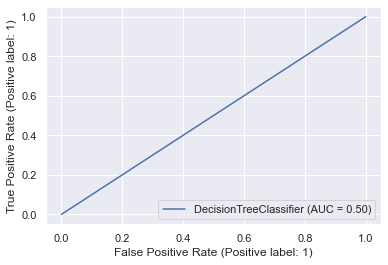

In [153]:
#ROC Curve
metrics.plot_roc_curve(dt_smote, X_final, y_final)

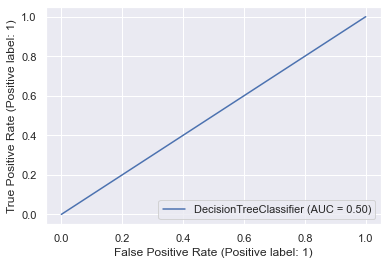

In [154]:
#ROC Curve
metrics.plot_roc_curve(dt_adasyn, X_final, y_final)

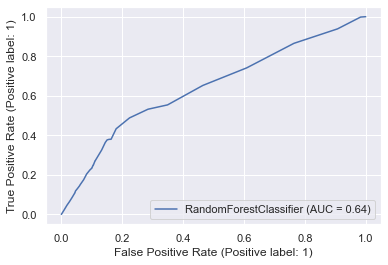

In [155]:
#ROC Curve
metrics.plot_roc_curve(rf_adasyn, X_final, y_final)

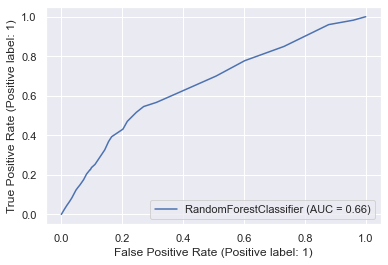

In [156]:
#ROC Curve
metrics.plot_roc_curve(rf_smote, X_final, y_final)

In [157]:
# Extracting only the fraudulent transactions from this test dataset:
fraud_df = df_pred[df_pred.is_fraud==1]
fraud_df.head()

amt  gender   city_pop       Dist  category_food_dining  \
1685  3.212455       0   3.135494  80.136594                     0   
1767  6.659960       1   7.174724  12.776135                     0   
1781  6.430252       1   7.174724  24.637848                     0   
1784  6.982575       1  11.175142  98.706628                     0   
1857  6.736552       0   3.135494  60.505374                     0   

      category_gas_transport  category_grocery_net  category_grocery_pos  \
1685                       0                     0                     0   
1767                       0                     0                     0   
1781                       0                     0                     0   
1784                       0                     0                     0   
1857                       0                     0                     0   

      category_health_fitness  category_home  ...  category_shopping_net  \
1685                        1              0  ...                      0   
1767                        0              0  ...                      0   
1781                        0              0  ...                      0   
1784                        0              0  ...                      1   
1857                        0              0  ...                      0   

      category_shopping_pos  category_travel  cust_age_group_20-30  \
1685                      0                0                     0   
1767                      0                0                     0   
1781                      0                0                     0   
1784                      0                0                     0   
1857                      1                0                     0   

      cust_age_group_30-40  cust_age_group_40-50  cust_age_group_50-60  \
1685                     0                     1                     0   
1767                     0                     0                     1   
1781                     0                     1                     0   
1784                     0                     0                     0   
1857                     0                     1                     0   

      cust_age_group_60 - Above  is_fraud  y_pred  
1685                          0         1       1  
1767                          0         1       1  
1781                          0         1       1  
1784                          1         1       1  
1857                          0         1       1  

[5 rows x 24 columns]

## AUC on the Logistic regression ADASYN test data

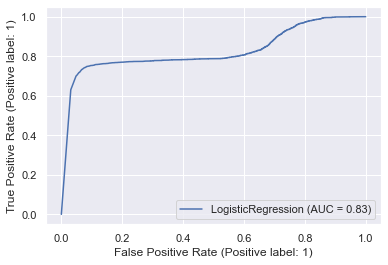

In [158]:
metrics.plot_roc_curve(lr_adasyn, X_final, y_final)

## Based on Area under curve 0.83 and sensitivity of 99.86% Sensitivity - Logistic Regression ADASYN is best towards predicting Fraudulent Transactions

### Cost Benefit Analysis

### Part I: Analyse the dataset and find the following figures:

In [159]:
#Load data
df_train = pd.read_csv(r'C:\Users\rockers.lokesh\OneDrive\Desktop\fraudTrain.csv')
df_test = pd.read_csv(r'C:\Users\rockers.lokesh\OneDrive\Desktop\fraudTest.csv')

In [160]:
# Let us merge the dataset to form the original

df_merged = pd.concat([df_train, df_test], axis=0)
df_merged.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [161]:
# Since the given (original) dataset is from Jan 1 2019 to Dec 31 2020, the data is of 24 months
# Total transactions can be found by checking the shape of the original dataframe
# Avg transactions per month would be to divide that shape/total by 24 (months)
avg_transactions_pm = df_merged.shape[0]/24

In [162]:
print("1. Average number of transactions per month are:", avg_transactions_pm)

1. Average number of transactions per month are: 77183.08333333333


In [163]:
df_merged[df_merged.is_fraud == 1]

Unnamed: 0 trans_date_trans_time            cc_num  \
2449          2449   2019-01-02 01:06:37     4613314721966   
2472          2472   2019-01-02 01:47:29   340187018810220   
2523          2523   2019-01-02 03:05:23   340187018810220   
2546          2546   2019-01-02 03:38:03     4613314721966   
2553          2553   2019-01-02 03:55:47   340187018810220   
...            ...                   ...               ...   
517197      517197   2020-12-22 22:05:48  2242176657877538   
517274      517274   2020-12-22 22:18:07  2242176657877538   
517341      517341   2020-12-22 22:31:48  2242176657877538   
517529      517529   2020-12-22 23:06:03  2242176657877538   
517571      517571   2020-12-22 23:13:39  2242176657877538   

                                   merchant       category      amt   first  \
2449                 fraud_Rutherford-Mertz    grocery_pos   281.06   Jason   
2472       fraud_Jenkins, Hauck and Friesen  gas_transport    11.52   Misty   
2523                 fraud_Goodwin-Nitzsche    grocery_pos   276.31   Misty   
2546                 fraud_Erdman-Kertzmann  gas_transport     7.03   Jason   
2553                     fraud_Koepp-Parker    grocery_pos   275.73   Misty   
...                                     ...            ...      ...     ...   
517197      fraud_Willms, Kris and Bergnaum   shopping_pos  1041.51  Travis   
517274                       fraud_Kuhn LLC   shopping_pos   868.09  Travis   
517341  fraud_Mosciski, Ziemann and Farrell   shopping_net  1039.42  Travis   
517529                   fraud_Bauch-Raynor    grocery_pos   289.27  Travis   
517571           fraud_Jaskolski-Vandervort       misc_net   766.38  Travis   

          last gender                       street  ...      lat     long  \
2449    Murphy      M    542 Steve Curve Suite 011  ...  35.9946 -81.7266   
2472      Hart      F    27954 Hall Mill Suite 575  ...  29.4400 -98.4590   
2523      Hart      F    27954 Hall Mill Suite 575  ...  29.4400 -98.4590   
2546    Murphy      M    542 Steve Curve Suite 011  ...  35.9946 -81.7266   
2553      Hart      F    27954 Hall Mill Suite 575  ...  29.4400 -98.4590   
...        ...    ...                          ...  ...      ...      ...   
517197  Daniel      M  1327 Rose Causeway Apt. 610  ...  34.6323 -89.8855   
517274  Daniel      M  1327 Rose Causeway Apt. 610  ...  34.6323 -89.8855   
517341  Daniel      M  1327 Rose Causeway Apt. 610  ...  34.6323 -89.8855   
517529  Daniel      M  1327 Rose Causeway Apt. 610  ...  34.6323 -89.8855   
517571  Daniel      M  1327 Rose Causeway Apt. 610  ...  34.6323 -89.8855   

        city_pop                       job         dob  \
2449         885            Soil scientist  1988-09-15   
2472     1595797  Horticultural consultant  1960-10-28   
2523     1595797  Horticultural consultant  1960-10-28   
2546         885            Soil scientist  1988-09-15   
2553     1595797  Horticultural consultant  1960-10-28   
...          ...                       ...         ...   
517197     14462    Database administrator  1959-03-03   
517274     14462    Database administrator  1959-03-03   
517341     14462    Database administrator  1959-03-03   
517529     14462    Database administrator  1959-03-03   
517571     14462    Database administrator  1959-03-03   

                               trans_num   unix_time  merch_lat merch_long  \
2449    e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124 -81.179483   
2472    bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364 -99.142791   
2523    b98f12f4168391b2203238813df5aa8c  1325473523  29.273085 -98.836360   
2546    397894a5c4c02e3c61c784001f0f14e4  1325475483  35.909292 -82.091010   
2553    7863235a750d73a244c07f1fb7f0185a  1325476547  29.786426 -98.683410   
...                                  ...         ...        ...        ...   
517197  35b0297dd026d2e9a75d024a5dec7955  1387749948  34.573471 -89.911011   
517274  da7f67d7375f10a054a3d919448c45dd  1387750687  34.091227 -90.

In [164]:
# Avg fraudulent transactions per month would be to divide the shape/total fraudulent rows by 24 (months)

avg_fraudtrans_pm = df_merged[df_merged.is_fraud == 1].shape[0]/24

In [165]:
# Average amount of fraud is the total fraudulent amount divided by the total number of fraudulent transactions

avg_fraud_amt = df_merged[df_merged.is_fraud == 1].amt.sum()/df_merged[df_merged.is_fraud == 1].shape[0]

In [166]:
print("2. Average number of fraudulent transactions per month:", avg_fraudtrans_pm)

2. Average number of fraudulent transactions per month: 402.125


In [167]:
print("3. Average amount per fraudulent transactions is:", avg_fraud_amt)

3. Average amount per fraudulent transactions is: 530.661412288882


### Part II: Compare the cost incurred per month by the bank before and after the model deployment

In [168]:
#Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month
cost_before_model = avg_fraud_amt*avg_fraudtrans_pm
cost_before_model

213392.2204166667

In [178]:
#Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = $1.5
#Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.
# Since the test dataframe has 7 months data(June to December), dividing by 7
TF = fraud_df.y_pred.sum()/7

Total cost of providing customer support per month for fraudulent transactions detected by the model = 607.68

In [179]:
#Let FN be the average number of transactions per month that are fraudulent but not detected by the model 
#Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN
FN = fraud_df[fraud_df.y_pred==0].is_fraud.sum()/7

Cost incurred due to these fraudulent transactions left undetected by the model = 8623.25

In [181]:
# Therefore, the cost incurred per month after the model is built and deployed = 1.5*TF + Average amount per fraudulent transaction * FN

cost_after_model = (1.5*TF) + (avg_fraud_amt*FN)

the cost incurred per month after the model is built and deployed = 9230.94

In [183]:
#Final savings = Cost incurred before - Cost incurred after.
Final_Savings = int(cost_before_model - cost_after_model)

Final Savings after deploying the model are : $ 204165.8